In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing dataset
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')

training_data = dataset_train.iloc[:, 1:2].values

#Feature scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_data)

#Create a data structure with 60 timesteps and 1 output

x_train = []
y_train = []

for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Building the RNN

import tensorflow as tf

regressor = tf.keras.models.Sequential()

#1st LSTM Layer
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(tf.keras.layers.Dropout(0.2))

#2nd LSTM Layer

regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

#3rd LSTM Layer

regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

#4th LSTM Layer

regressor.add(tf.keras.layers.LSTM(units = 50))
regressor.add(tf.keras.layers.Dropout(0.2))

#Output layer

regressor.add(tf.keras.layers.Dense(units= 1))

#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


#Fitting the RNN to the training data

regressor.fit(x_train, y_train,
              epochs = 100,
              batch_size = 32)

Epoch 1/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0455
Epoch 2/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0051
Epoch 11/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0053
Epoch 12/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

In [ ]:
regressor1 = tf.keras.models.Sequential()

#1st GRU Layer
regressor1.add(tf.keras.layers.GRU(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor1.add(tf.keras.layers.Dropout(0.2))

#2nd GRU Layer

regressor1.add(tf.keras.layers.GRU(units = 50, return_sequences = True))
regressor1.add(tf.keras.layers.Dropout(0.2))

#3rd GRU Layer

regressor1.add(tf.keras.layers.GRU(units = 50, return_sequences = True))
regressor1.add(tf.keras.layers.Dropout(0.2))

#4th GRU Layer

regressor1.add(tf.keras.layers.GRU(units = 50))
regressor1.add(tf.keras.layers.Dropout(0.2))

#Output layer

regressor1.add(tf.keras.layers.Dense(units= 1))

#Compiling the GRU
regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')


#Fitting the GRU to the training data

regressor1.fit(x_train, y_train,
              epochs = 100,
              batch_size = 32)

Epoch 1/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0437
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0049
Epoch 4/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0045
Epoch 5/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0044
Epoch 6/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 9/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 10/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 11/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 12/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 13/100
38/38 [=====

In [ ]:
#Real stock price of January 2017

dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')

real_stock_price = dataset_test.iloc[:, 1:2].values

#Predicted stock price of Jan 2017

total_dataset = pd.concat((dataset_train["Open"], dataset_test['Open']), axis =0)

inputs = total_dataset[len(total_dataset) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)
predicted_stock_price = regressor.predict(x_test)
print(predicted_stock_price.shape)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


(20, 60, 1)
(20, 1)


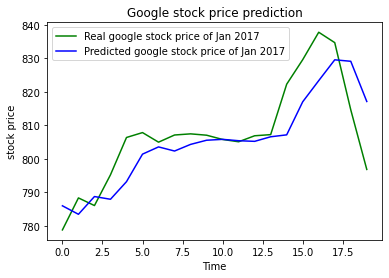

In [ ]:
#Visualizing the results

plt.plot(real_stock_price, color = "Green", label = 'Real google stock price of Jan 2017')
plt.plot(predicted_stock_price, color = "Blue", label = 'Predicted google stock price of Jan 2017')
plt.title("Google stock price prediction")
plt.xlabel('Time')
plt.ylabel('stock price')
plt.legend()
plt.show()